<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Morales Chiriboga Angel Ricardo** 

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [19]:
# Escriba aquí su código para el ejercicio 1
# Se importo el código de miningscience
import miningscience as msc
help(msc.download_pubmed)
help(msc.mining_pubs)

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    Función que extrae listado de artículos desde pubmed a traves de un keyword que ingresa el usuario entre comillas

Help on function mining_pubs in module miningscience:

mining_pubs(tipo, archivo)
    Función que pide como primera entrada tres tipos de opciones "DP", "AU" y "AD". Si coloca "DP" el resultado es un data con el PMID y el DP_year, si es "AU" recupera el número de autores (num_auth) por PMID, y si el tipo es "AD" el retorno es un dataframe con el country y el num_auth. Se pide un segundo argumento que corresponde al keyword usado para la descarga de archivos con la funcion download pubmed




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [23]:
# Escriba aquí su código para el ejercicio 2
!pip install biopython 
data = msc.download_pubmed("Ecuador genomics")
import re
data1 = re.findall(r"PMID- ", data)
print("El número de articulos es: ", len(data1))
data2 = re.findall(r"\d{8}",data)
print("El PMID del primer articulo es: ", data2[0])

El número de articulos es:  193
El PMID del primer articulo es:  35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [28]:
# Escriba aquí su código para el ejercicio 3
pub_year = msc.mining_pubs("DP", "Ecuador genomics")
pub_authors = msc.mining_pubs("AU", "Ecuador genomics")
countries = msc.mining_pubs("AD", "Ecuador genomics")

#Verificación DataFramaes
print(countries[1:11])
print(pub_authors[1:11])
print(pub_year[1:11])

# 2 primeros registros y 2 últimos registos
print()
print("2 primeros registros y 2 últimos registos")
print()

# Countries
print(countries[0:2])
print()
print(countries[67:69])
print()

# Pub_authors
print(pub_authors[0:2])
print()
print(pub_authors[191:193])
print()

# Pub_year
print(pub_year[0:2])
print()
print(pub_year[67:69])

           pais  numero de autores
1        Canada                 83
2       Ecuador                314
3          Peru                 28
4       Bolivia                  5
5           USA                407
6            UK                198
7         Japan                 39
8         India                 45
9       Germany                141
10  Switzerland                 23
        PMID  Numero de autores
1   35120121                 14
2   35113400                  2
3   35104837                 54
4   35064679                  7
5   35047841                  9
6   35043846                  6
7   35018222                 10
8   34962985                  7
9   34960145                  4
10  34938321                  8
        PMID Año de publicación
1   35121084               2022
2   35120121               2021
3   35113400               2022
4   35104837               2022
5   35064679               2021
6   35047841               2022
7   35043846               2022
8   350

## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


Valor media es:  2018.1813471502592
Valor de desviación estandar es:  3.1677516094333185


Text(0, 0.5, 'Autores repetidos')

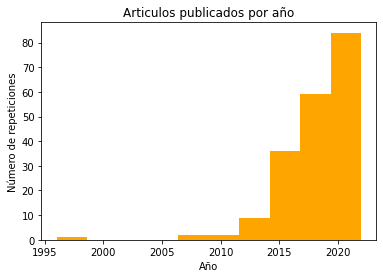

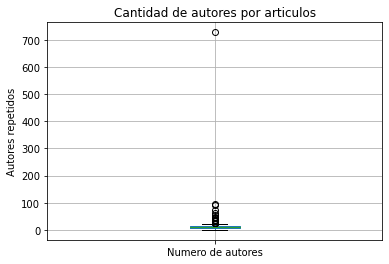

In [63]:
# Escriba aquí su código para el ejercicio 4
# Grafico del Pub_year
# Primero importamos las librerias
import pandas as pd
import matplotlib.pyplot as plot
# Continuamos con el ejercicio
from collections import Counter
pub_year["Año de publicación"]= pub_year["Año de publicación"].astype("int")
mean_py = pub_year["Año de publicación"].mean()
sd_py = pub_year["Año de publicación"].std()
print("Valor media es: ", mean_py)
print ("Valor de desviación estandar es: ", sd_py)
itv=range(min(pub_year["Año de publicación"]))
plot.hist(x = pub_year["Año de publicación"], color= "orange" )
plot.title("Articulos publicados por año")
plot.xlabel("Año")
plot.ylabel("Número de repeticiones")

# Gráfica de Boxplot
plot.figure()
boxplot = pub_authors[0:827].boxplot(column=["Numero de autores"])
plot.title("Cantidad de autores por articulos")
plot.ylabel("Autores repetidos")

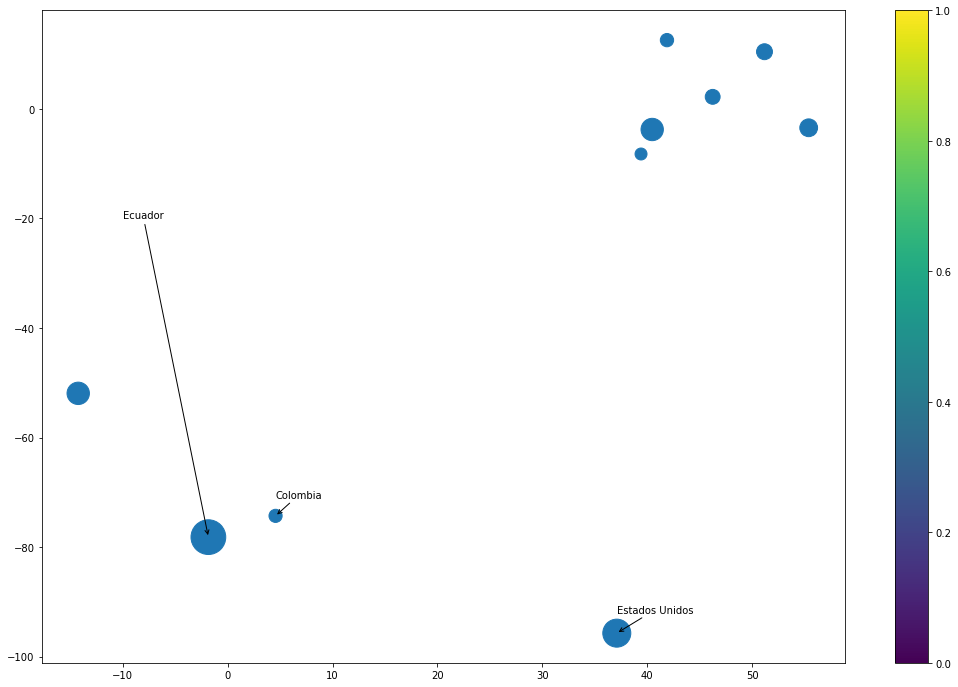

In [62]:
# Gráfico de los paises
paises = countries.sort_values("numero de autores")

countries_latitud = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 37.09024, -1.831239  ] 
                 
countries_longitud = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -95.712891, -78.183406]
repeticiones = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]

import matplotlib.pyplot as plot
%matplotlib inline

plot.scatter(countries_latitud, countries_longitud, repeticiones) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("Colombia", xy= (4.570868, -74.297333), 
            xytext = (4.570868, -71), arrowprops = ard)
plot.annotate("Ecuador", xy= (-1.831239, -78.183406), 
            xytext = (-10, -20), arrowprops = ard)
plot.annotate("Estados Unidos", xy = (37.09024, -95.712891), 
             xytext = (37.09024, -92), arrowprops = ard)  
params = plot.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plot.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**
**Gráfico distribución normal**
# En el gráfico de distribución normal se puede observar que entre los años 2010 y 2020 se da un aumento progresivo en la publicación de artículos, mientras que en los años 1995 y 2007 esto no se ve reflejado, siendo pocos los artículos publicados
**Boxplot**
# En la gráfica de boxplot se puede observar la cantidad de autores por artículo, obteniendo una media de 8 autores por artículo.
**Mapa de ciencia**
# Gráfico mapa se puede observar paises como Colombia posee un número ,mayor de autores seguido por Ecuador y finalmente se encuentra USA.

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [5]:
# Escriba aquí su código para el ejercicio 6



**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```